In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style="whitegrid")
os.makedirs("play_outputs", exist_ok=True)


In [6]:
apps = pd.read_csv("C:\\Users\\Divya\\Downloads\\googleplaystore.csv")
reviews = pd.read_csv("C:\\Users\\Divya\\Downloads\\googleplaystore_user_reviews.csv")

display(apps.head(4))
display(reviews.head(6))


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [11]:
print("APPS:"); display(apps.info())
print("\nREVIEWS:"); display(reviews.info())


APPS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


None


REVIEWS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


None

In [20]:
print("Missing values in apps:")
miss_apps = apps.isnull().sum().sort_values(ascending=False)
display(miss_apps.head(40))
miss_apps.to_csv("play_outputs/missing_apps.csv")

print("\nMissing values in reviews:")
miss_reviews = reviews.isnull().sum().sort_values(ascending=False)
display(miss_reviews.head(40))
miss_reviews.to_csv("play_outputs/missing_reviews.csv")



Missing values in apps:


Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Size                 0
Reviews              0
Category             0
App                  0
Price                0
Installs             0
Last Updated         0
Genres               0
dtype: int64


Missing values in reviews:


Translated_Review         26868
Sentiment_Polarity        26863
Sentiment                 26863
Sentiment_Subjectivity    26863
App                           0
dtype: int64

In [25]:
print("Apps numeric summary:")
display(apps.describe(include='number').T)
apps.describe(include='number').T.to_csv("play_outputs/apps_describe.csv")

print("\nReviews numeric summary:")
display(reviews.describe(include='number').T)
reviews.describe(include='number').T.to_csv("play_outputs/reviews_describe.csv")


Apps numeric summary:


,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0



Reviews numeric summary:


,count,mean,std,min,25%,50%,75%,max
Sentiment_Polarity,37432.0,0.182146,0.351301,-1.0,0.000000,0.150000,0.40,1.0
Sentiment_Subjectivity,37432.0,0.492704,0.259949,0.0,0.357143,0.514286,0.65,1.0


In [28]:
print("Apps columns:")
print(list(apps.columns))
print("\nReviews columns:")
print(list(reviews.columns))


Apps columns:
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Reviews columns:
['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [33]:
print("Total apps:", len(apps))
print("Unique categories:", apps['Category'].nunique())
print("Total reviews rows:", len(reviews))
if 'Sentiment' in reviews.columns:
    print("Sentiment labels:", reviews['Sentiment'].unique())


Total apps: 10841
Unique categories: 34
Total reviews rows: 64295
Sentiment labels: ['Positive' nan 'Neutral' 'Negative']


In [37]:
apps.head(20).to_csv("play_outputs/apps_head20.csv", index=False)

reviews.head(20).to_csv("play_outputs/reviews_head20.csv", index=False)


In [51]:
apps_clean = apps.copy()

apps_clean['Installs'] = apps_clean['Installs'].str.replace("+", "", regex=False)
apps_clean['Installs'] = apps_clean['Installs'].str.replace(",", "", regex=False)
apps_clean['Installs'] = pd.to_numeric(apps_clean['Installs'], errors='coerce')

def convert_size(size):
    if size.endswith("M"):
        return float(size.replace("M","")) * 1_000_000
    elif size.endswith("k"):
        return float(size.replace("k","")) * 1_000
    else:
        return np.nan

apps_clean['Size'] = apps_clean['Size'].replace('Varies with device', np.nan)
apps_clean['Size'] = apps_clean['Size'].dropna().apply(convert_size)

apps_clean['Price'] = apps_clean['Price'].str.replace("$","", regex=False)
apps_clean['Price'] = pd.to_numeric(apps_clean['Price'], errors='coerce')

apps_clean['Reviews'] = pd.to_numeric(apps_clean['Reviews'], errors='coerce')

apps_clean.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [54]:
apps_clean.drop_duplicates(subset=['App'], inplace=True)

apps_clean = apps_clean.dropna(subset=['Rating'])

print("Remaining rows:", len(apps_clean))
apps_clean.head()


Remaining rows: 8197


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
reviews_clean = reviews.copy()

reviews_clean = reviews_clean.dropna(subset=['Translated_Review'])

reviews_clean['Sentiment'] = reviews_clean['Sentiment'].fillna("Unknown")

reviews_clean['Sentiment_Polarity'] = pd.to_numeric(reviews_clean['Sentiment_Polarity'], errors='coerce')
reviews_clean['Sentiment_Subjectivity'] = pd.to_numeric(reviews_clean['Sentiment_Subjectivity'], errors='coerce')

reviews_clean.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


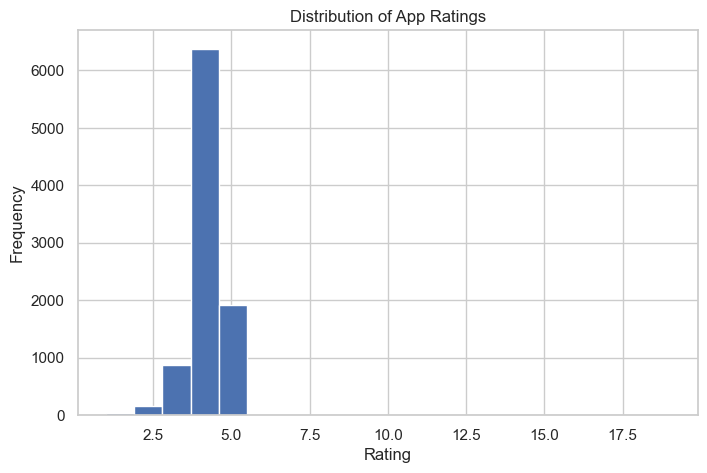

In [64]:
plt.figure(figsize=(8,5))
plt.hist(apps['Rating'].dropna(), bins=20)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


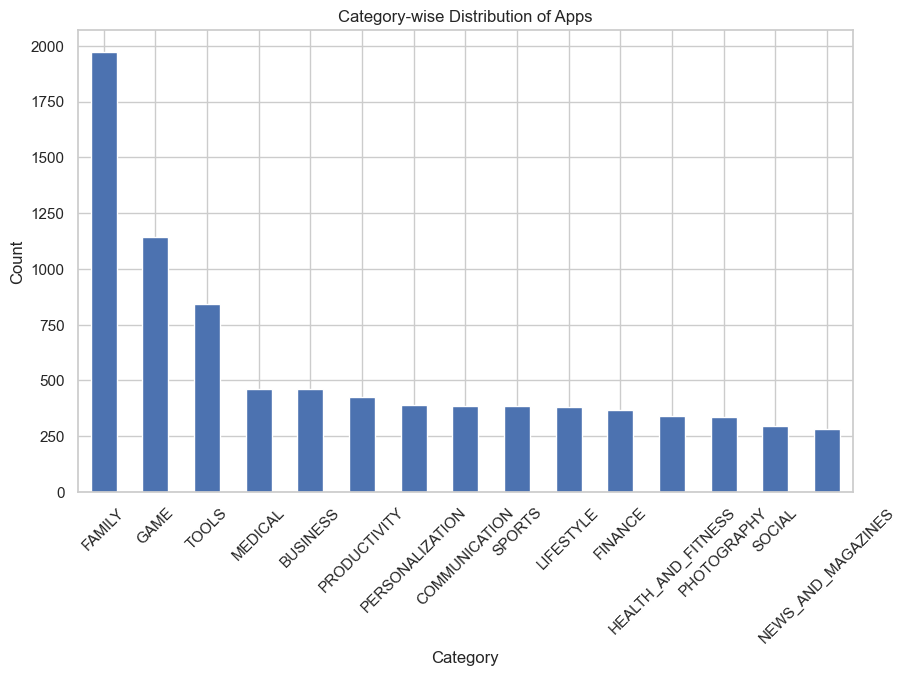

In [67]:
plt.figure(figsize=(10,6))
apps['Category'].value_counts().head(15).plot(kind='bar')
plt.title("Category-wise Distribution of Apps")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


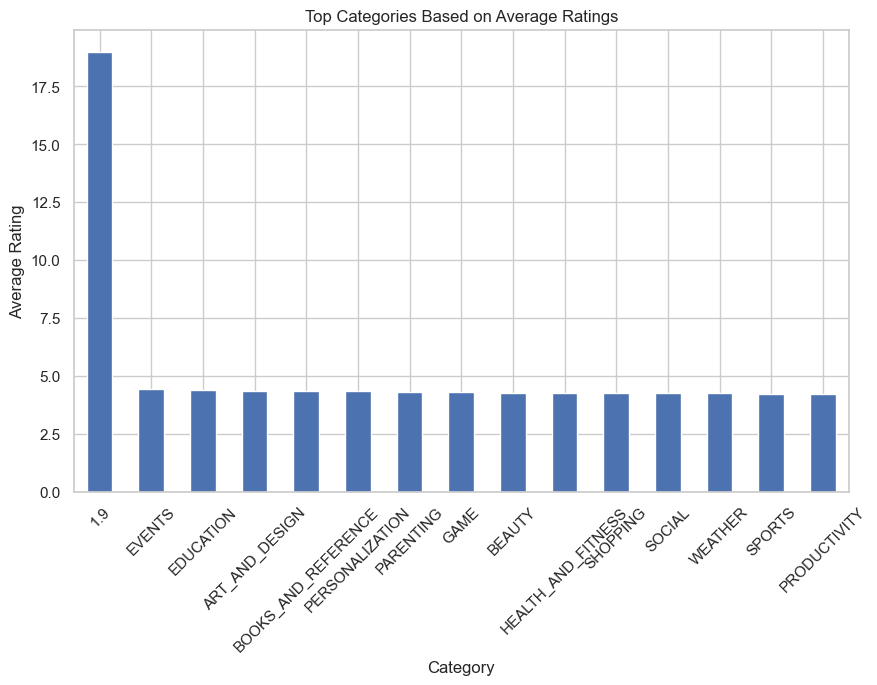

In [70]:
cat_rating = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
cat_rating.plot(kind='bar')
plt.title("Top Categories Based on Average Ratings")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


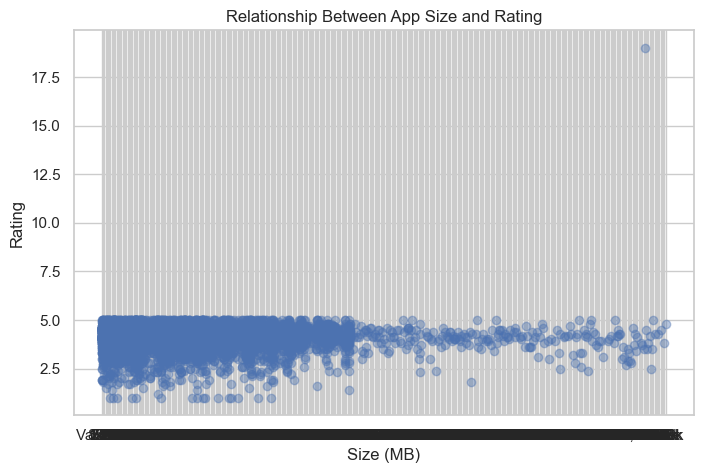

In [75]:
plt.figure(figsize=(8,5))
plt.scatter(apps['Size'], apps['Rating'], alpha=0.4)
plt.title("Relationship Between App Size and Rating")
plt.xlabel("Size (MB)")
plt.ylabel("Rating")
plt.show()


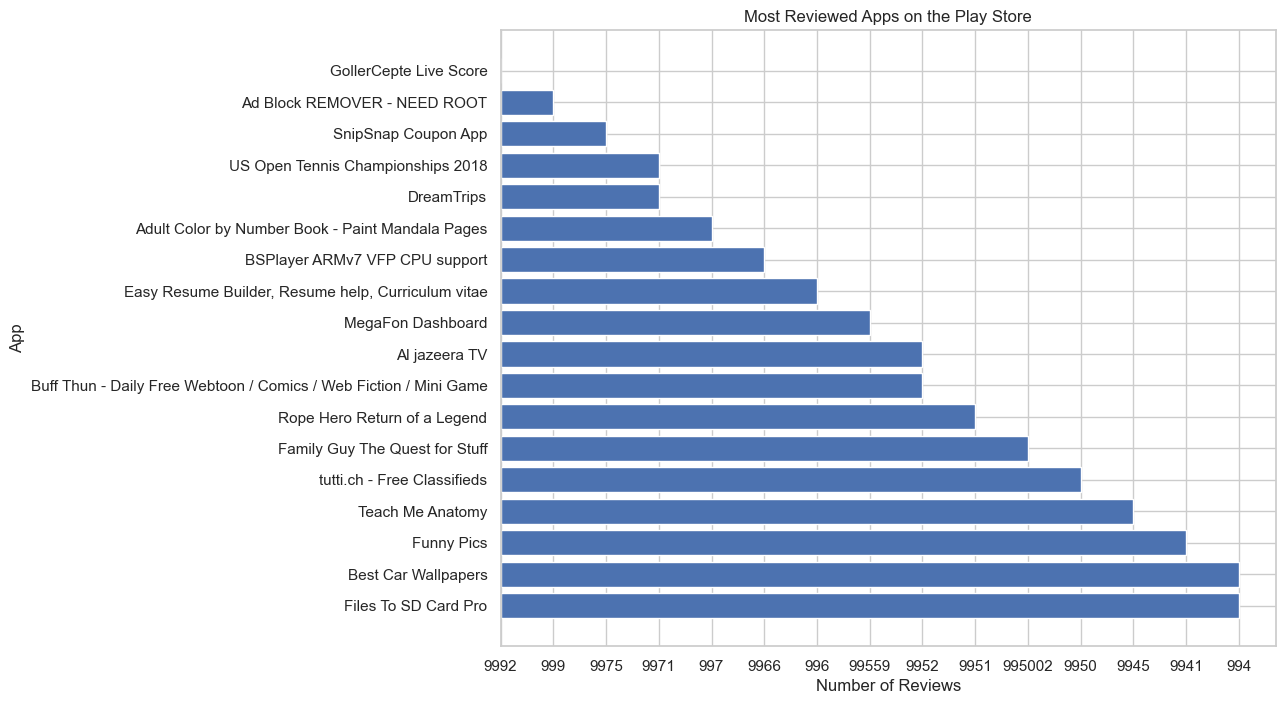

In [78]:
top_reviews = apps.sort_values(by='Reviews', ascending=False).head(20)

plt.figure(figsize=(10,8))
plt.barh(top_reviews['App'], top_reviews['Reviews'])
plt.title("Most Reviewed Apps on the Play Store")
plt.xlabel("Number of Reviews")
plt.ylabel("App")
plt.gca().invert_yaxis()
plt.show()


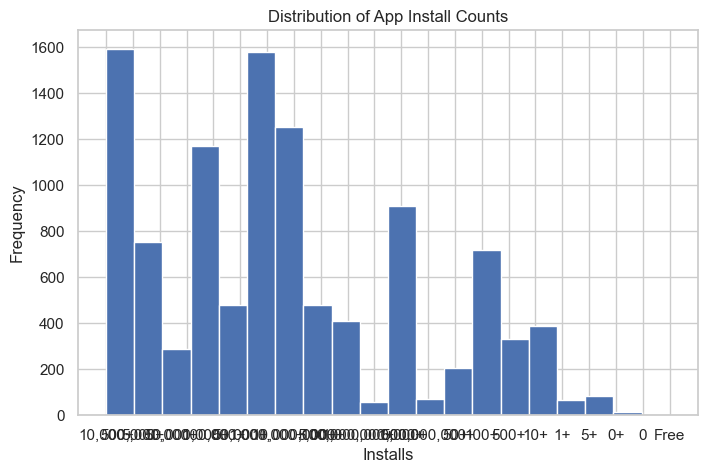

In [80]:
plt.figure(figsize=(8,5))
plt.hist(apps['Installs'], bins=20)
plt.title("Distribution of App Install Counts")
plt.xlabel("Installs")
plt.ylabel("Frequency")
plt.show()


In [84]:
apps['Price'] = apps['Price'].str.replace('$', '', regex=False)

apps['Price'] = apps['Price'].replace('Free', '0')

apps['Price'] = apps['Price'].str.strip()

apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

apps['Price'] = apps['Price'].fillna(0)


AttributeError: Can only use .str accessor with string values!

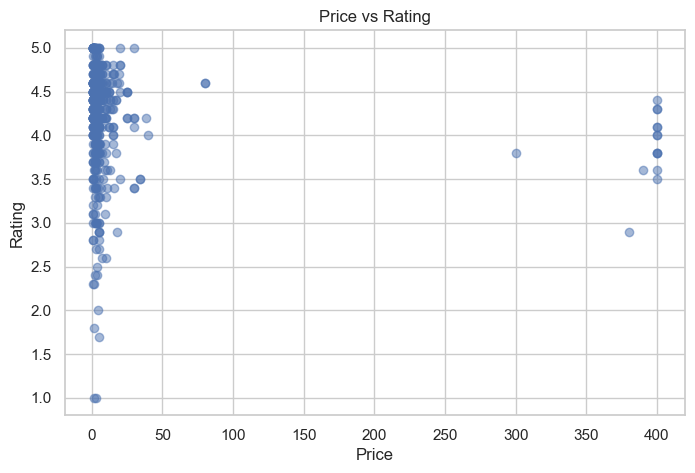

In [87]:
paid_apps = apps[apps['Price'] > 0]

plt.figure(figsize=(8,5))
plt.scatter(paid_apps['Price'], paid_apps['Rating'], alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price vs Rating")
plt.show()


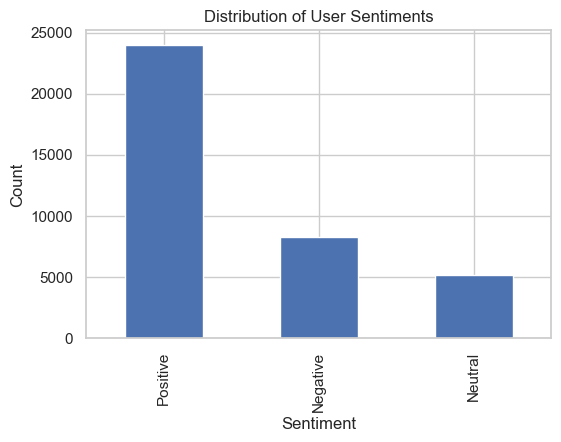

In [90]:
plt.figure(figsize=(6,4))
reviews['Sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of User Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


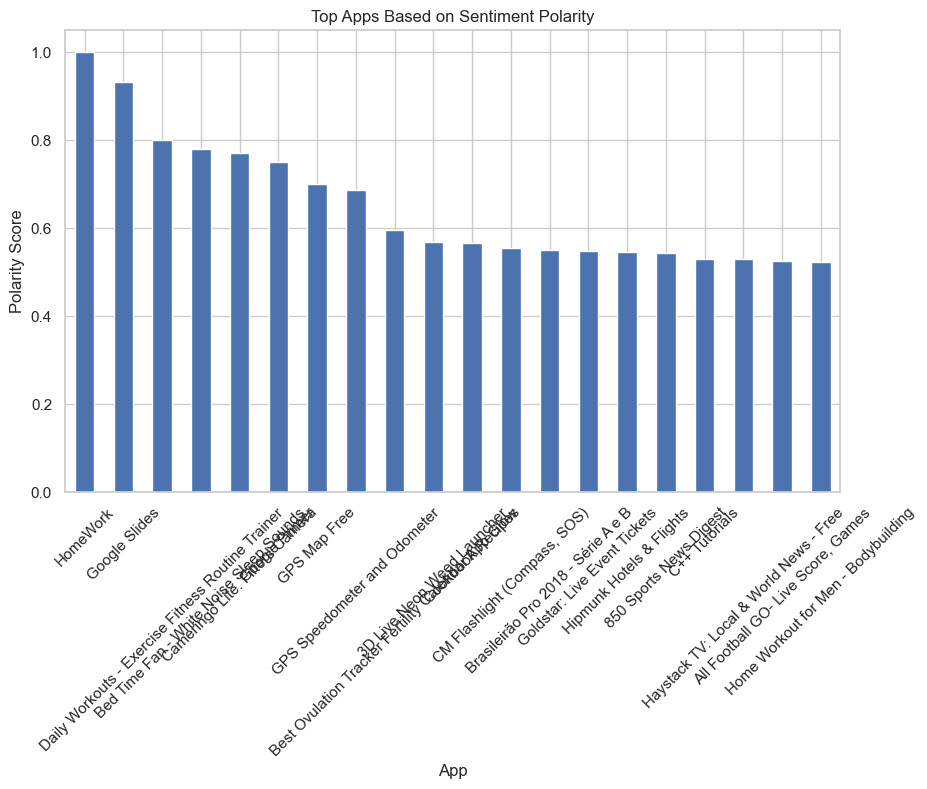

In [93]:
polarity = reviews.groupby('App')['Sentiment_Polarity'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
polarity.plot(kind='bar')
plt.title("Top Apps Based on Sentiment Polarity")
plt.xlabel("App")
plt.ylabel("Polarity Score")
plt.xticks(rotation=45)
plt.show()


In [94]:
from wordcloud import WordCloud


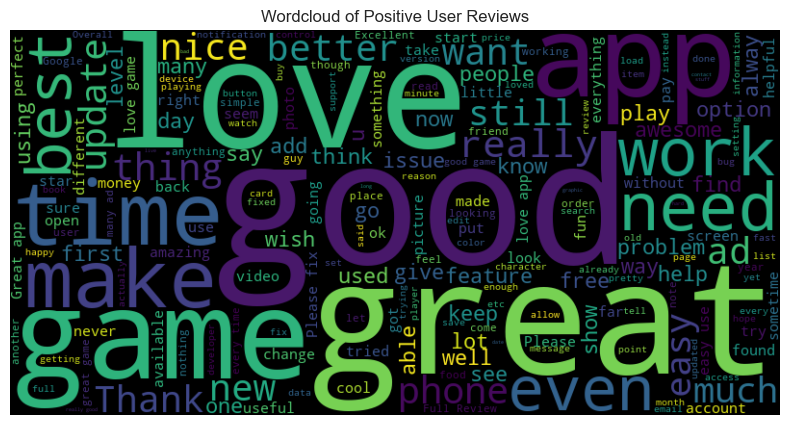

In [98]:
positive_text = " ".join(reviews[reviews['Sentiment']=="Positive"]['Translated_Review'].dropna())

wc = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud of Positive User Reviews")
plt.show()
